# Importing required libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Reading the Image

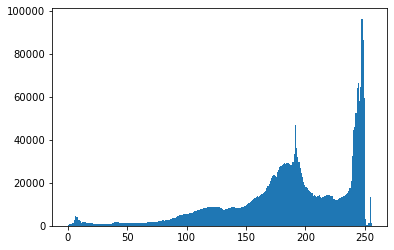

In [3]:
img = cv2.imread('./IP Images Input/covid1.jpeg', 0)
plt.hist(img.ravel(),256,[0,256])

cv2.imshow("Original Image", cv2.resize(img, None, fx=0.25, fy=0.25))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Method 1: Histogram Equalization

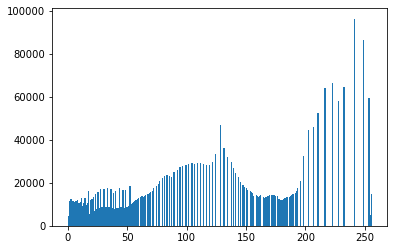

In [4]:
imgHistEq = cv2.equalizeHist(img)
plt.hist(imgHistEq.ravel(),256,[0,256])

cv2.imshow("Original Image", cv2.resize(img, None, fx=0.25, fy=0.25))
cv2.imshow("Histogram Equalized Image", cv2.resize(imgHistEq, None, fx=0.25, fy=0.25))

cv2.waitKey(0)
cv2.destroyAllWindows()

# Method 2: Image Invert/Complement

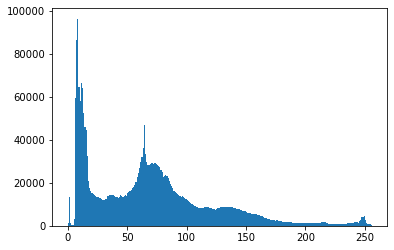

In [7]:
imgInvert = cv2.bitwise_not(img)
# imgInvert=255-img
plt.hist(imgInvert.ravel(),256,[0,256])

cv2.imshow("Original Image", cv2.resize(img, None, fx=0.25, fy=0.25))
cv2.imshow("Image Invert", cv2.resize(imgInvert, None, fx=0.25, fy=0.25))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Method 3: Gamma Correction

In [21]:
def gammaCorrection(originalImg, gamma):
    powGamma = 1 / gamma

    transformGamma = [((i / 255) ** powGamma) * 255 for i in range(256)]
    transformGamma = np.array(transformGamma, np.uint8)

    return cv2.LUT(originalImg, transformGamma)

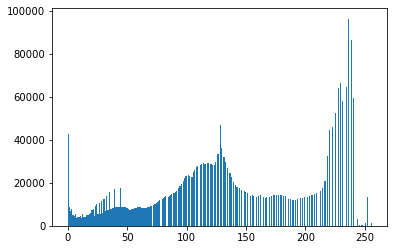

In [30]:
gammaCorrectedImg = gammaCorrection(img, 0.42)

plt.hist(gammaCorrectedImg.ravel(),256,[0,256])

cv2.imshow("Original Image", cv2.resize(img, None, fx=0.25, fy=0.25))
cv2.imshow("Gamma Correction Image", cv2.resize(gammaCorrectedImg, None, fx=0.25, fy=0.25))
cv2.waitKey(0)
cv2.destroyAllWindows()

### Method 3.1: Gamma Correction and Image Negative

Gives a segregated image of Lungs portion, making it easier for the segmentation

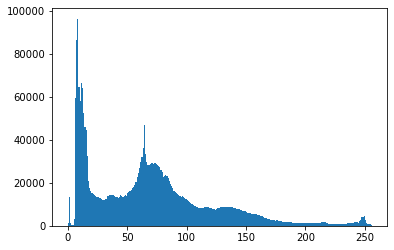

In [31]:
gammaCorrectedImg = gammaCorrection(img, 0.42)
gammaCorrectedImgInvert = cv2.bitwise_not(img)

plt.hist(gammaCorrectedImgInvert.ravel(),256,[0,256])

cv2.imshow("Original Image", cv2.resize(img, None, fx=0.25, fy=0.25))
cv2.imshow("Gamma Correction Image", cv2.resize(gammaCorrectedImg, None, fx=0.25, fy=0.25))
cv2.imshow("Gamma Correction Image Negative", cv2.resize(gammaCorrectedImgInvert, None, fx=0.25, fy=0.25))
cv2.waitKey(0)
cv2.destroyAllWindows()